In [1]:
import tensorflow as tf

In [4]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


In [5]:

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]#10


In [13]:
print (X_test.shape)
print (X_train.shape)
print (y_test.shape)
print (y_train.shape)
X_train1 = X_train[:3000]
y_train1 = y_train[:3000]
print (X_train1.shape)
print (y_train1.shape)

(10000, 1, 28, 28)
(60000, 1, 28, 28)
(10000, 10)
(60000, 10)
(3000, 1, 28, 28)
(3000, 10)


In [55]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=10,
        shear_range=0.5,
        zoom_range=0.2,
        fill_mode='nearest')
datagen.fit(X_train1,seed=3)
i = 0
for X_batch, y_batch in datagen.flow(X_train1, y_train1, batch_size= 50):
    i+=1
    X_train1 = numpy.row_stack((X_train1, X_batch))
    y_train1 = numpy.row_stack((y_train1, y_batch))
        #numpy.column_stack((y_train1, y_batch))
    if i >= 3000: 
        break
        
print (X_train1.shape)
print (y_train1.shape)


KeyboardInterrupt: 

In [7]:
#early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
seed = 7
numpy.random.seed(seed)
def larger_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(50, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Convolution2D(15, 3, 3, activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.3))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(32, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train1, y_train1, validation_data=(X_test, y_test), nb_epoch=100, batch_size=200, verbose=2, callbacks=[early_stopping])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

C:\Users\lingq\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (5, 5), activation="relu", padding="valid", input_shape=(1, 28, 28...)`
  
C:\Users\lingq\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  
C:\Users\lingq\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3000 samples, validate on 10000 samples
Epoch 1/100
40s - loss: 2.0962 - acc: 0.2897 - val_loss: 1.5755 - val_acc: 0.5171
Epoch 2/100
43s - loss: 1.2765 - acc: 0.5743 - val_loss: 0.7616 - val_acc: 0.7697
Epoch 3/100
47s - loss: 0.7285 - acc: 0.7687 - val_loss: 0.4533 - val_acc: 0.8702
Epoch 4/100
54s - loss: 0.4928 - acc: 0.8473 - val_loss: 0.3244 - val_acc: 0.9084
Epoch 5/100
45s - loss: 0.3678 - acc: 0.8937 - val_loss: 0.2620 - val_acc: 0.9239
Epoch 6/100
43s - loss: 0.2863 - acc: 0.9213 - val_loss: 0.2224 - val_acc: 0.9335
Epoch 7/100
49s - loss: 0.2528 - acc: 0.9283 - val_loss: 0.2007 - val_acc: 0.9412
Epoch 8/100
41s - loss: 0.2135 - acc: 0.9397 - val_loss: 0.1782 - val_acc: 0.9475
Epoch 9/100
43s - loss: 0.1976 - acc: 0.9397 - val_loss: 0.1639 - val_acc: 0.9501
Epoch 10/100
43s - loss: 0.1762 - acc: 0.9497 - val_loss: 0.1710 - val_acc: 0.9504
Epoch 11/100
43s - loss: 0.1572 - acc: 0.9547 - val_loss: 0.1391 - val_acc: 0.9595
Epoch 12/100
45s - loss: 0.1463 - acc: 0.9590 -

In [ ]:
#test on smaller size training data
train_num=[300,600,900,1200,1500,1800] 
for n in train_num:
    X_train1 = X_train[:n] 
    y_train1 = y_train[:n] 
    datagen = ImageDataGenerator( rotation_range=10,
    shear_range=0.5,
    zoom_range=0.2,
    fill_mode='nearest')
    datagen.fit(X_train1) 
    i = 0 
    for X_batch, y_batch in datagen.flow(X_train1, y_train1, batch_size= 50):
        i+=1
        X_train1 = numpy.row_stack((X_train1, X_batch))
        y_train1 = numpy.row_stack((y_train1, y_batch))
            #numpy.column_stack((y_train1, y_batch))
        if i >= 3000: 
            break
    model = larger_model() 
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    model.fit(X_train1, y_train1, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2, callbacks=[early_stopping]) 
    scores = model.evaluate(X_test, y_test, verbose=0) 
    print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

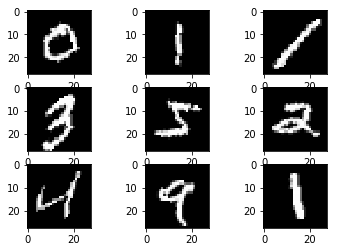

In [24]:
#keras ImageDataGenerator example
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(
        rotation_range=10,
    width_shift_range=0,
        shear_range=0.5,
        zoom_range=0.2,
        fill_mode='nearest')

X_show=X_train[:9]
y_show=y_train[:9]
# fit parameters from data
datagen.fit(X_show)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_show, y_show, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break